In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize
from scipy.optimize import Bounds
import pandas as pd

In [15]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd

# Load data from an Excel file
data = pd.read_excel('/Users/marisape/Desktop/subject conditions.xlsx')  # Update the path as needed

# Check the first few rows of the DataFrame
print(data.head())

# Access the specific column
RTs = data['QUEST result'].to_numpy()  # Replace with the actual column name


  Subject ID Hazards (H_LR = [0, 1], H_RL = [0, 1])  \
0         BD                      H_LR = H_RL = 0.2   
1         BD                      H_LR = H_RL = 0.2   
2         BD                      H_LR = H_RL = 0.2   
3         DL                      H_LR = H_RL = 0.2   
4         DL                      H_LR = H_RL = 0.2   

  Stimulus (SF, SNF, WF, WWF, WNF) SAT (Both, S, A) Experimenter  \
0                               SF             Both          Tim   
1                               WF             Both          Tim   
2                              WNF             Both          Tim   
3                               SF             Both          Tim   
4                               WF             Both          Tim   

  Date of experiment (M/D/Y)  Relevant figure(s)  QUEST result Unnamed: 8  
0        2015-07-16 00:00:00                 NaN           NaN        NaN  
1            7/18/15 Morning                 NaN           3.0        NaN  
2          7/18/15 Afternoon    

In [39]:
# 2. Define the objective function
def laterErrFcn(fits):
    muR, deltaS = fits
    return -np.sum(np.log(norm.pdf(RTs, muR, deltaS)))

In [41]:
# 3. Define initial conditions
lower_bounds = [0.001, 0.001]
upper_bounds = [1000, 1000]

In [43]:
# 4. Run the fits
bounds = Bounds(lower_bounds, upper_bounds)

result = minimize(laterErrFcn, initial_values, method='L-BFGS-B', bounds=bounds)

In [45]:
# Extract fitted parameters
fits = result.x
nllk = result.fun  # negative log-likelihood

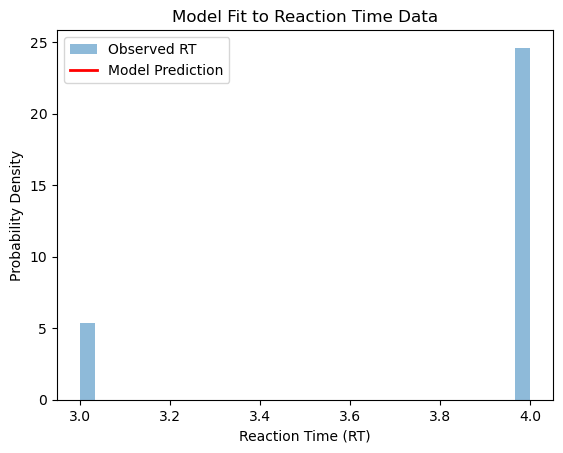

In [47]:
# 5. Evaluate the fits
plt.hist(RTs, bins=30, density=True, alpha=0.5, label='Observed RT')
muR, deltaS = fits
x = np.linspace(np.min(RTs), np.max(RTs), 100)
predictedPDF = norm.pdf(x, muR, deltaS)
plt.plot(x, predictedPDF, 'r-', linewidth=2, label='Model Prediction')

plt.legend()
plt.xlabel('Reaction Time (RT)')
plt.ylabel('Probability Density')
plt.title('Model Fit to Reaction Time Data')
plt.show()
